In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=2

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(

    "PlantVillage",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE 
)

Found 1500 files belonging to 3 classes.


In [6]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

47

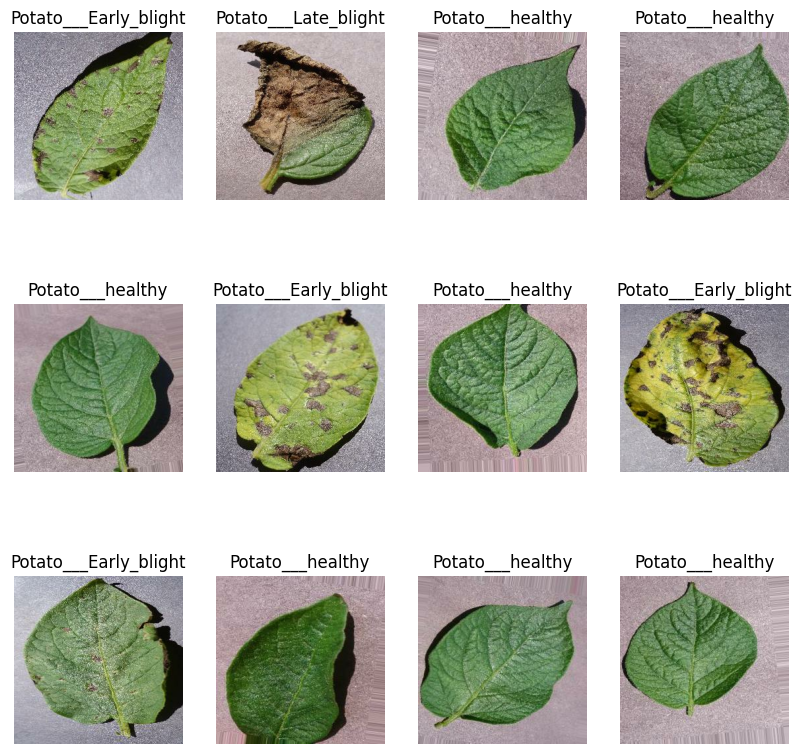

In [8]:
plt.figure(figsize= (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
       ax=plt.subplot(3,4,i+1)
       plt.imshow(image_batch[i].numpy().astype('uint8'))
       plt.title(class_names[label_batch[i]])
       plt.axis("off") 



In [9]:
train_size= 0.8
len(dataset)*train_size

37.6

In [10]:
train_ds= dataset.take(37)
len(train_ds)

37

In [11]:
test_ds=dataset.skip(37)
len(test_ds)

10

In [12]:
val_size=0.1
len(dataset)*val_size

4.7

In [13]:
val_ds= test_ds.take(4)
len(val_ds)

4

In [14]:
test_ds= test_ds.take(4)
len(test_ds)

4

In [15]:
def get_dataset_partitions_tf(ds,  train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
     ds_size=len(ds)

     if shuffle:
        
         ds= ds.shuffle(shuffle_size, seed=12)

    
     train_size = int(train_split * ds_size)
     val_size= int(val_split *ds_size)
     
     train_ds= ds.take(train_size)
    
     val_ds = ds.skip(train_size).take(val_size)
     test_ds = ds.skip(train_size).skip(val_size)

     return train_ds, val_ds, test_ds





In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(val_ds)

4

In [18]:
len(train_ds)

37

In [19]:
len(test_ds)

6

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [21]:

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])


In [22]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])


In [23]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define input shape and number of classes
input_shape = ( IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])



C:\Users\jody\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/2
37/37 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.4220 - loss: 3.4413 - val_accuracy: 0.6875 - val_loss: 0.5804
Epoch 2/2
37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 979ms/step - accuracy: 0.7892 - loss: 0.4672 - val_accuracy: 0.8984 - val_loss: 0.2479


In [27]:
scores=model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.8985 - loss: 0.2783


In [28]:
scores

[0.2528017461299896, 0.90625]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 2, 'steps': 37}

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss'] 

val_loss = history.history['val_loss'] 

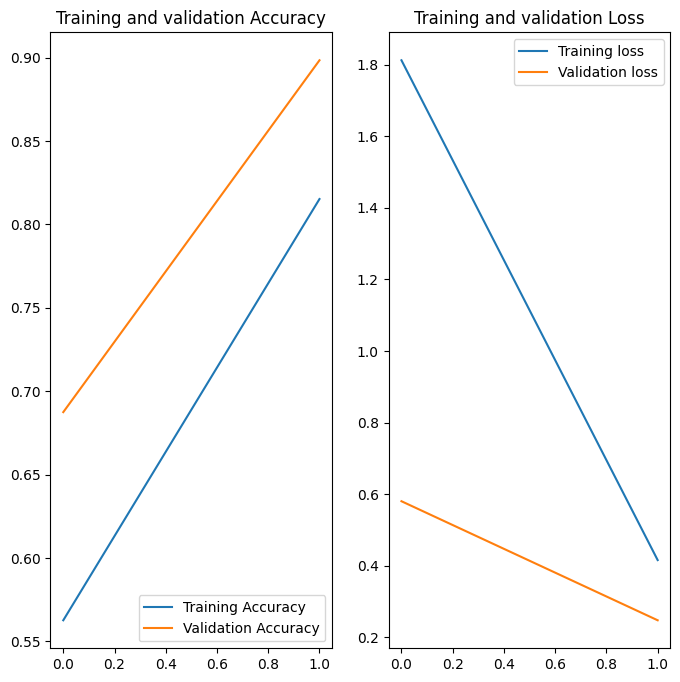

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
predicted label: Potato___Early_blight


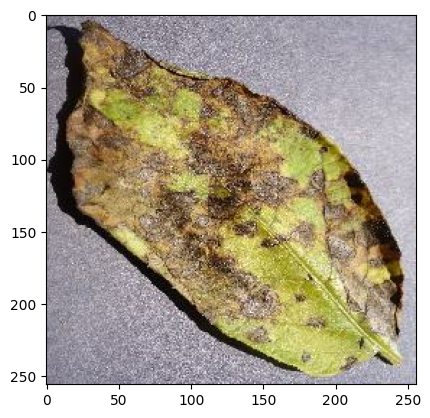

In [34]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [35]:
import numpy as np
import tensorflow as tf

def predict(model, img, class_names):
    # Convert the image to array and expand dimensions to match the model input
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add a batch dimension

    # Ensure the image is properly scaled if the model expects it (e.g., rescaling from 0-255 to 0-1)
    # img_array = img_array / 255.0  # Uncomment this line if rescaling is needed

    # Make predictions
    predictions = model.predict(img_array)

    # Extract the predicted class and confidence
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


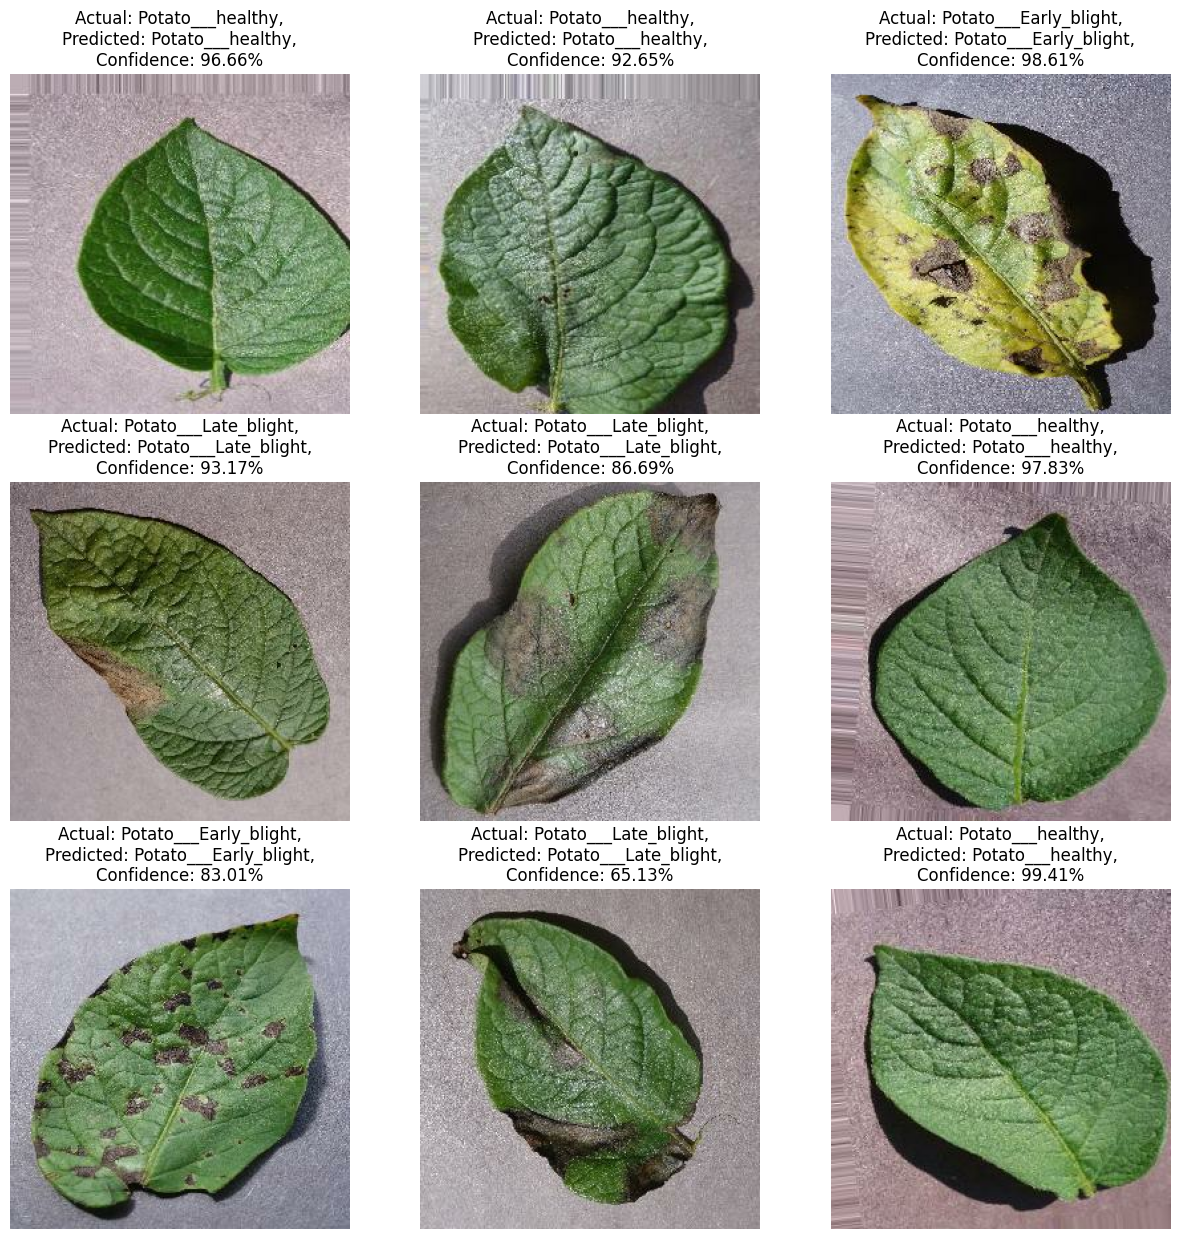

In [36]:
plt.figure(figsize=(15,15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Use `images[i]` instead of `image_batch[i]`
        
        # Call the predict function and pass class_names
        predicted_class, confidence = predict(model, images[i].numpy(), class_names)
        actual_class = class_names[labels[i]]
        
        # Set the title with predicted and actual class
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}%")
        plt.axis("off")



In [37]:
#import os

#model_version= max([int(i.split('.')[0]) for i in os.listdir("../models") + ['0']])
#model.save(f"../models/{model_version}.keras") 

In [38]:
#model_version = 0
#model.save(f"../models/{model_version}.keras")  

In [42]:
import os

# Get the current highest model version
model_versions = [int(i) for i in os.listdir("../models") if i.isdigit()]  # Check only folders that are digits
model_version = max(model_versions + [0]) + 1  # Increment the version number

# Create a folder for the new model version
folder_path = f"../models/{model_version}"
os.makedirs(folder_path, exist_ok=True)

# Save the model inside the newly created folder with a .keras file extension
model.save(os.path.join(folder_path, "model.keras"))

print(f"Model saved in folder: {folder_path}")


Model saved in folder: ../models/3
